## Data Analysis - empathetic dialogues (ParlAI - Facebook Research)

###### **Original Dataset:** [HuggingFace](https://huggingface.co/datasets/empathetic_dialogues) -- [Facebook Research (GitHub)](https://github.com/facebookresearch/EmpatheticDialogues) -- [ParlAI](https://parl.ai/docs/tasks.html#empathetic-dialogues)
###### **Students:** Yacine MOKHTARI & Lilia IZRI

### Lectures des données + rapide analyse

In [37]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

PATH = "./"
FILENAMES = ["test", "train", "valid"]
COLNAMES = ["conv_id", "utterance_idx", "context", "prompt", "utterance"]
df_test = pd.read_csv(PATH+FILENAMES[0]+".csv", usecols=COLNAMES)
df_train = pd.read_csv(PATH+FILENAMES[1]+".csv", usecols=COLNAMES)
df_valid = pd.read_csv(PATH+FILENAMES[2]+".csv", usecols=COLNAMES)

In [2]:
# Un aperçu :
df_train.head(10)

,conv_id,utterance_idx,context,prompt,utterance
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,I remember going to see the fireworks with my ...
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,Was this a friend you were in love with_comma_...
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,This was a best friend. I miss her.
3,hit:0_conv:1,4,sentimental,I remember going to the fireworks with my best...,Where has she gone?
4,hit:0_conv:1,5,sentimental,I remember going to the fireworks with my best...,We no longer talk.
5,hit:0_conv:1,6,sentimental,I remember going to the fireworks with my best...,Oh was this something that happened because of...
6,hit:1_conv:2,1,afraid,i used to scare for darkness,it feels like hitting to blank wall when i se...
7,hit:1_conv:2,2,afraid,i used to scare for darkness,Oh ya? I don't really see how
8,hit:1_conv:2,3,afraid,i used to scare for darkness,dont you feel so.. its a wonder
9,hit:1_conv:2,4,afraid,i used to scare for darkness,I do actually hit blank walls a lot of times b...


In [3]:
df_test.isna().sum(), df_train.isna().sum(), df_valid.isna().sum()

(conv_id          0
 utterance_idx    0
 context          0
 prompt           0
 utterance        0
 dtype: int64,
 conv_id          0
 utterance_idx    0
 context          0
 prompt           0
 utterance        0
 dtype: int64,
 conv_id          0
 utterance_idx    0
 context          0
 prompt           0
 utterance        0
 dtype: int64)

In [4]:
print("Test length :", len(df_test))
print("Train length :", len(df_train))
print("valid length :", len(df_valid))
print("")
print("Nombre total de données :", len(df_test)+len(df_train)+len(df_valid))

Test length : 10943
Train length : 76673
valid length : 12030

Nombre total de données : 99646


In [5]:
print("Test :", df_test.duplicated().sum(), " dupliqué(s) !")
print("Train :", df_train.duplicated().sum(), " dupliqué(s) !")
print("Valid :", df_valid.duplicated().sum(), " dupliqué(s) !")

Test : 0  dupliqué(s) !
Train : 0  dupliqué(s) !
Valid : 0  dupliqué(s) !


In [6]:
# retirer les dupliquées
df_test = df_test[~df_test.duplicated()]
df_train = df_train[~df_train.duplicated()]
df_valid = df_valid[~df_valid.duplicated()]

print("Test length :", len(df_test))
print("Train length :", len(df_train))
print("valid length :", len(df_valid))
print("")
print("Nombre total de données après suppression de dupliqués:", len(df_test)+len(df_train)+len(df_valid))

Test length : 10943
Train length : 76673
valid length : 12030

Nombre total de données après suppression de dupliqués: 99646


* Au départ j'ai pas pris les deux premières colonnes, so j'avais des dupliquées mais je comprend mieux mtn :) 

In [7]:
### Regarder si l'intersection est vide 
if ((len(pd.merge(df_test, df_train, how="inner")), len(pd.merge(df_test, df_valid, how="inner")), len(pd.merge(df_valid, df_train, how="inner"))) == (0,0,0)):
    print("Il n y a pas d'intersection entre les ensemble !")
else:
    print("Intersection détectée, regarde en détail :)")

Il n y a pas d'intersection entre les ensemble !


### Reconstitution du dataframe global
1. Union des trois df
2. Comprendre mieux le df
3. Trier et grouper pour reproduire les scénarios/dialogues 

In [8]:
# Union
frames = [df_test, df_train, df_valid]
df = pd.concat(frames)
df.head(10)

,conv_id,utterance_idx,context,prompt,utterance
0,hit:0_conv:0,1,guilty,I felt guilty when I was driving home one nigh...,Yeah about 10 years ago I had a horrifying exp...
1,hit:0_conv:0,2,guilty,I felt guilty when I was driving home one nigh...,Did you suffer any injuries?
2,hit:0_conv:0,3,guilty,I felt guilty when I was driving home one nigh...,No I wasn't hit. It turned out they were drunk...
3,hit:0_conv:0,4,guilty,I felt guilty when I was driving home one nigh...,Why did you feel guilty? People really shouldn...
4,hit:0_conv:0,5,guilty,I felt guilty when I was driving home one nigh...,I don't know I was new to driving and hadn't e...
5,hit:34_conv:69,1,caring,My mother stopped by my house one day and said...,Well_comma_ can you tell me about your experie...
6,hit:34_conv:69,2,caring,My mother stopped by my house one day and said...,Yeah i wanted to tell you about the time i was...
7,hit:34_conv:69,3,caring,My mother stopped by my house one day and said...,Oh my goodness_comma_ that's very scary! I hop...
8,hit:34_conv:69,4,caring,My mother stopped by my house one day and said...,Yeah he was punished hes in jail still
9,hit:37_conv:74,1,lonely,I just broke up with my girlfriend_comma_ we w...,I there_comma_ dont know what to do_comma_ jst...


In [9]:
# Comprendre qu'il existe plusieurs "dialogues/scénarios" pour un même contexte
# et que ce qui les diffèrent est le "prompt"
df[df.context.values == "guilty"].head(10)

,conv_id,utterance_idx,context,prompt,utterance
0,hit:0_conv:0,1,guilty,I felt guilty when I was driving home one nigh...,Yeah about 10 years ago I had a horrifying exp...
1,hit:0_conv:0,2,guilty,I felt guilty when I was driving home one nigh...,Did you suffer any injuries?
2,hit:0_conv:0,3,guilty,I felt guilty when I was driving home one nigh...,No I wasn't hit. It turned out they were drunk...
3,hit:0_conv:0,4,guilty,I felt guilty when I was driving home one nigh...,Why did you feel guilty? People really shouldn...
4,hit:0_conv:0,5,guilty,I felt guilty when I was driving home one nigh...,I don't know I was new to driving and hadn't e...
224,hit:291_conv:582,1,guilty,I waited at a restaurant for 30 minutes befor...,Did I tell you what happened with Li the other...
225,hit:291_conv:582,2,guilty,I waited at a restaurant for 30 minutes befor...,No_comma_ you didn't tell me! What happened?
226,hit:291_conv:582,3,guilty,I waited at a restaurant for 30 minutes befor...,She's 45 minutes late to our anniversary dinne...
227,hit:291_conv:582,4,guilty,I waited at a restaurant for 30 minutes befor...,Oh no! Is she okay?! Don't beat yourself up to...
260,hit:337_conv:674,1,guilty,I felt bad recently because I was dishonest wi...,I felt pretty bad when I was having girl talk ...


Nous remarquons ainsi que :
* Il existe plusieurs "dialogues/scénarios" pour un même contexte
* "utterence_idx" indique l'ordre des messages "utterence" pour un "conv_id" donnée

Ainsi, il conviendrait peut-être de trier le jeu de données suivant les colonnes ["conv_id", "utterance_idx"] et de les grouper selon les colonnes ["context", "prompt"].

In [10]:
df_sorted = df.sort_values(by=["conv_id", "utterance_idx"])
df_sorted.head(10)

,conv_id,utterance_idx,context,prompt,utterance
0,hit:0_conv:0,1,guilty,I felt guilty when I was driving home one nigh...,Yeah about 10 years ago I had a horrifying exp...
1,hit:0_conv:0,2,guilty,I felt guilty when I was driving home one nigh...,Did you suffer any injuries?
2,hit:0_conv:0,3,guilty,I felt guilty when I was driving home one nigh...,No I wasn't hit. It turned out they were drunk...
3,hit:0_conv:0,4,guilty,I felt guilty when I was driving home one nigh...,Why did you feel guilty? People really shouldn...
4,hit:0_conv:0,5,guilty,I felt guilty when I was driving home one nigh...,I don't know I was new to driving and hadn't e...
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,I remember going to see the fireworks with my ...
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,Was this a friend you were in love with_comma_...
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,This was a best friend. I miss her.
3,hit:0_conv:1,4,sentimental,I remember going to the fireworks with my best...,Where has she gone?
4,hit:0_conv:1,5,sentimental,I remember going to the fireworks with my best...,We no longer talk.


In [11]:
def extraireSelonDialogue(dataframe):
    question = []
    reponse =  []
    ctx = []

    qst = True # Si à vrai, ajouter en tant que question, si faux, ajouter en tant que réponse
    for i in tqdm(np.arange(len(dataframe))):
        tmp = dataframe.iloc[i]

        # un nouveau scénario/dialogue
        if (tmp["utterance_idx"] == 1):
            # si le dernier ajout était une question, 
            # NaN pour la réponse 
            if qst == False :
                reponse.append("")
                qst = True
        
        # Ajout de la Question / Réponse
        if qst:
                question.append(tmp.utterance.replace("_comma_", ","))
                
                # Ajout du contexte (émotion)
                ctx.append(tmp["context"])
        else : 
            reponse.append(tmp.utterance.replace("_comma_", ","))
        qst = not qst

        

    return question, reponse, ctx

In [12]:
q, r, c = extraireSelonDialogue(df_sorted)
assert len(q) == len(r) == len(c)

100%|██████████| 99646/99646 [00:12<00:00, 7868.36it/s]


In [13]:
df_QA = pd.DataFrame(data =  { "Context" : c,  "Question" : q, "Reponse" : r})
df_QA.head(20)

,Context,Question,Reponse
0,guilty,Yeah about 10 years ago I had a horrifying exp...,Did you suffer any injuries?
1,guilty,No I wasn't hit. It turned out they were drunk...,Why did you feel guilty? People really shouldn...
2,guilty,I don't know I was new to driving and hadn't e...,
3,sentimental,I remember going to see the fireworks with my ...,"Was this a friend you were in love with, or ju..."
4,sentimental,This was a best friend. I miss her.,Where has she gone?
5,sentimental,We no longer talk.,Oh was this something that happened because of...
6,surprised,My girlfriend got me a pet toad today!,Do you like toads?
7,surprised,I do! I was so happy when I opened the box and...,"That was nice of your girlfriend, do you love ..."
8,impressed,I really like the new paint job on my house.,That's nice. What color did you paint it?
9,impressed,I went with blue and yellow.,Those are swell colors! I am sure they will br...


In [14]:
# Enlever les questions sans réponses (fin de conv)
mask = (df_QA["Reponse"].values == "")
print("Il y a", mask.sum(), " questions sans réponses.")

Il y a 4468  questions sans réponses.


In [15]:
df_QA[mask].head(12)

,Context,Question,Reponse
2,guilty,I don't know I was new to driving and hadn't e...,
18,guilty,"No, he doesn't knows",
27,confident,Statistics exam. I aced this class for sure. T...,
36,joyful,Thanks,
43,anxious,Yeah my family. We're going to the beach.,
50,excited,I am taking to a movie and the Olive Garden.,
71,surprised,No not yet. He's sitting here playing Battlef...,
76,content,I got all of my housework done. For the rest o...,
83,devastated,I know but now I am afraid he will never return,
100,faithful,Wow. Looks like you are doing a good job.,


In [16]:
# Garder que les questions AVEC réponse 
# François Landes : "C'est toujours triste de supprimer des données" (oui bon, lui il dit "features" xD)
df_QA = df_QA[~mask]

#### Sauvegarder le jeu de données ainsi obtenu !

In [17]:
OUTPUT_PATH = "./output/"
OUTPUT_NAME = "EmpatheticDialogues.tsv"
OUTPUT_NAME2 = "EmpatheticDialogues_wo_context.tsv"

df_QA.to_csv(OUTPUT_PATH + OUTPUT_NAME, sep="\t")
df_QA[["Question", "Reponse"]].to_csv(OUTPUT_PATH + OUTPUT_NAME2, sep="\t")

In [24]:
df_QA.groupby("Context").describe()

Question         \
                count unique   
Context                        
afraid           1541   1529   
angry            1650   1639   
annoyed          1690   1682   
anticipating     1472   1463   
anxious          1498   1494   
apprehensive     1174   1172   
ashamed          1216   1210   
caring           1296   1264   
confident        1524   1518   
content          1404   1394   
devastated       1348   1336   
disappointed     1478   1474   
disgusted        1510   1502   
embarrassed      1402   1398   
excited          1794   1785   
faithful          884    879   
furious          1447   1435   
grateful         1556   1547   
guilty           1455   1443   
hopeful          1486   1481   
impressed        1521   1516   
jealous          1466   1452   
joyful           1479   1475   
lonely           1553   1547   
nostalgic        1447   1446   
prepared         1451   1446   
proud            1674   1658   
sad              1645   1642   
sentimental      1339   1329   
surprised        2451   2448   
terrified        1500   1484   
trusting         1238   1219   

                                                                     Reponse  \
                                                            top freq   count   
Context                                                                        
afraid         I used to be afraid of the dark but now I am ...    5    1541   
angry              Someone cut me off in traffic the other day.    4    1650   
annoyed                         My dog pooped on the rug today.    6    1690   
anticipating  I can't wait for the new Super Smash Brothers ...    3    1472   
anxious       My husband usually gets a substantial bonus th...    2    1498   
apprehensive        I have an important job interview this week    2    1174   
ashamed                      I just ate a whole pack of cookies    3    1216   
caring                    i loved taking care of my sisters pet   17    1296   
confident                           Thank you, I appreciate it!    2    1524   
content                   I am so happy with my life right now.    4    1404   
devastated           i was crushed when i didnt win the lottery    5    1348   
disappointed                                  What do you mean?    2    1478   
disgusted                        my cat vomited on my rug today    4    1510   
embarrassed      i tripped in public the other day which sucked    2    1402   
excited       I cannot wait for the new super smash bros for...    4    1794   
faithful                       I have never cheated on my wife.    2     884   
furious               i was pissed when i saw my gate left open    3    1447   
grateful                  My neighbor returned my wallet today.    3    1556   
guilty        i felt bad when i couldnt get my daughter the ...    3    1455   
hopeful                           I applied for a job last week    4    1486   
impressed     My friend got promoted last week after one mon...    2    1521   
jealous       I am jealous of my coworker, he is very smart ...    4    1466   
joyful                       I am so happy it is almost August.    2    1479   
lonely          I have had a break up recently. I feel so empty    2    1553   
nostalgic                    Yes, those were the good old days!    2    1447   
prepared      I am excited for the new super smash bros, it ...    2    1451   
proud                         My son said his first word today!    6    1674   
sad           Before I met my girlfriend and friends I was v...    2    1645   
sentimental   I get sentimental about my family, they mean a...    5    1339   
surprised                               I walked up on a snake.    2    2451   
terrified             i was scared walking home the other night    4    1500   
trusting      i knew i shouldnt have trusted my brother with...   10    1238   

                                                                             
             

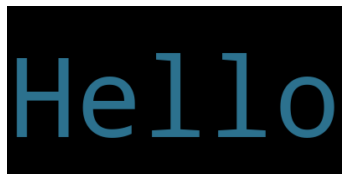

In [38]:
contexts = df_QA.Context.unique()
wordcloud = WordCloud(stopwords=STOPWORDS).generate("Hello there is there")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
len(df_QA)

47589

In [ ]:
Empathetic Facebook Reseach : 47.5K ("""  :ok:  """)
I don't have a body         : 9K ("""  ...  """)
7K